# **Ejemplo de diseño de calsificador de comandos sencillos con NLP para robot**
---
Elaborado por Javier Chaparro

**Universidad Escuela Colombiana de Ingeniería Julio Garavito**

---

El objetivo de este ejericio es diseñar un clasificador de comandos sencillos mediante técnicas de Procesamiento de Lenguaje Natural (NLP) para implementarse en un robot móvil.

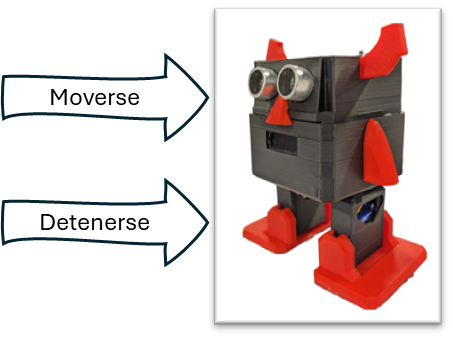

Características del diseño:
1. Los comandos son dados como texto
2. Existe una diversidad de formas de dar el mismo comando. Se usan 6 posibilidades.
3. Se hace el diseño mediante la biblioteca de Keras
4. Los comandos son *Moverse* y *Detenerse*

Las palabras de entrenamiento son:

1. Moverse: *muevase*,*adelante*,*vamos*,*hágale*,*no sea perezoso*, y *ánimo*
2. Detenerse: *pare*,*detengase*,*quieto*,*no más*,*manos arriba*,y *púdrete*

##**Se importan las librerias necesarias**

In [23]:
import numpy as np
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Embedding,Dense

##**Comandos de entrenamiento**

Se define el texto y su categorización para entrenar la red neuronal

In [12]:
# Se definen los 12 comandos de entrenamiento
comandos =[
          'Muevase',
          'Adelante',
          'Vamos',
          'Hagale',
          'rapido vamos',
          'Animo',
          'Pare no mas',
          'Detengase',
          'Quieto',
          'No mas',
          'Manos arriba',
          'Qué se detenga'
]
# Se define rótulos (categorías)
etiquetas = array([0,0,0,0,0,0,1,1,1,1,1,1])
# Las primeras seis son de moverse y las otras seis de detenerse

Se crea un vocabulario y se codifican los comandos del entrenamiento

In [13]:
Vocab_size = 50
comandos_codificados = [one_hot(d,Vocab_size) for d in comandos]
print(f'Comando Codificados: {comandos_codificados}')

Comando Codificados: [[31], [16], [6], [29], [22, 6], [36], [19, 20, 7], [40], [8], [20, 7], [8, 46], [41, 27, 13]]


Se define la máxima longitud de entrada a la red neuronal y se rellenan los comandos

In [171]:
max_length = 4
comandos_rellenos = pad_sequences(comandos_codificados,maxlen=max_length,padding='post')
print(comandos_rellenos)

[[31  0  0  0]
 [16  0  0  0]
 [ 6  0  0  0]
 [29  0  0  0]
 [22  6  0  0]
 [36  0  0  0]
 [19 20  7  0]
 [40  0  0  0]
 [ 8  0  0  0]
 [20  7  0  0]
 [ 8 46  0  0]
 [41 27 13  0]]


##**Creación de modelo de red neuronal con una capa de embedding de 3 dimensiones**


In [81]:
# Se usa un modelo secuencial de capas (Embedding, Densas, Convolución, Flatten,...)
modelo = Sequential()
# Se crea y adiciona una capa de embedding
capa_embedding = Embedding(input_dim=Vocab_size,output_dim=3,input_length=max_length)
modelo.add(capa_embedding)
# Se adiciona una capa de Flatten
modelo.add(Flatten())
# Se adiciona una capa densa
modelo.add(Dense(1,activation='sigmoid'))
print(modelo.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 4, 3)              150       
                                                                 
 flatten_3 (Flatten)         (None, 12)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 163 (652.00 Byte)
Trainable params: 163 (652.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Se definen los parámetros de entrenamiento del modelo

In [83]:
modelo.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

Gráfico de la red

Text(0.01661006, -0.02684151, 'Quieto')

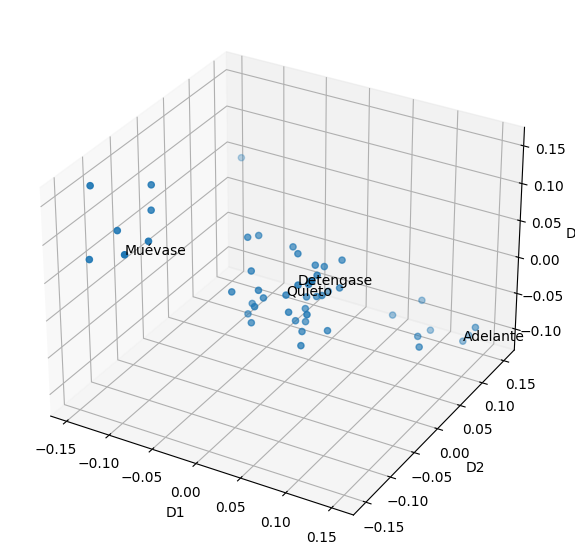

In [174]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

puntos3=np.array(capa_embedding.get_weights())
x=puntos3[0,:,0]
y=puntos3[0,:,1]
z=puntos3[0,:,2]

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z)
ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('D3')
ax.text3D(x[6],y[6],z[6],'Muévase')
ax.text3D(x[8],y[8],z[8],'Adelante')
ax.text3D(x[30],y[30],z[30],'Detengase')
ax.text3D(x[39],y[39],z[39],'Quieto')

##**Entrenamiento del modelo**

El modelo se entrena con los comando (rellenos), las etiquetas, y un número deseado de entrenamientos.

In [ ]:
modelo.fit(comandos_rellenos,etiquetas,epochs=100,verbose=1)

##**Evaluación del Modelo**

El modelo se puede evaluar con los mismos datos que se entreno (¡Esto no es lo deseado!)

In [86]:
loss, accuracy = modelo.evaluate(comandos_rellenos, etiquetas, verbose=1)

1/1 [==============================] - 0s 139ms/step - loss: 0.5894 - acc: 1.0000


In [170]:
print(accuracy)

1.0


##**Utilización del Modelo**
Creación de una entrada para probar el modelo

In [168]:
entrada=['Quieto']
entrada_cod=[one_hot(d,Vocab_size) for d in entrada]
padded_entrada = pad_sequences(entrada_cod,maxlen=max_length,padding='post')
padded_entrada

array([[8, 0, 0, 0]], dtype=int32)

Aplicación de la entrada al modelo

In [169]:
modelo.predict(padded_entrada)
print(modelo.predict(padded_entrada))
if(modelo.predict(padded_entrada)<0.5):
  print("Moverse")
else:
  print("Detenerse")

1/1 [==============================] - 0s 23ms/step
[[0.5026066]]
1/1 [==============================] - 0s 27ms/step
Detenerse
